In [2]:
import numpy as np
import pandas as pd
from collections import Counter
import requests
import os
import timeit

In [3]:
class LogisticRegression:
    def __init__(self, lr = 0.001, n_iters = 1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.random.uniform(-1, 1, n_features)
        self.bias = np.random.uniform(-1, 1, 1)[0]
        
        #gradient descent
        for i in range(self.n_iters):
            lin_model = np.dot(X, self.weights) + self.bias
            y_pred = self._sigmoid(lin_model)
            
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)
            
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
            
        
    def predict(self, X, threshold):
        lin_model = np.dot(X, self.weights) + self.bias
        y_pred = self._sigmoid(lin_model)
        y_pred_cls = [1 if i > threshold else -1 for i in y_pred]
        return y_pred_cls
    
    #helper sigmoid function
    def _sigmoid(self, linear):
        return 1 / (1 + np.exp(-linear))

In [4]:
def test_metrics(actual, pred):
    actual = pd.Series(actual)
    pred = pd.Series(pred)
    
    TP = ((actual == 1) & (pred == 1)).sum()
    FP = ((actual != 1) & (pred == 1)).sum()
    TN = ((actual != 1) & (pred != 1)).sum()
    FN = ((actual == 1) & (pred != 1)).sum()
    
    accuracy = (actual == pred).mean()
    precision = TP / (pred == 1).sum()
    recall = TP / (actual == 1).sum()
    f1 = (2 * precision * recall) / (precision + recall)   
    
    
    print({"accuracy":accuracy,"precision":precision,"recall":recall, "F1 Score":f1})
    confusion_mat = pd.DataFrame({'Actually Positive': [TP, FN], 
                                  'Actually Negative': [FP, TN]},
                                index = ['Predicted Positive', 'Predicted Negative'])    
    
    return confusion_mat

## Feature Set 1 - Positive and Negative Counts

In [11]:
train_df = pd.read_csv('train1.csv')
test_df = pd.read_csv('test1.csv')

In [12]:
X_train = training_df.drop(['Unnamed: 0', 'Label'], axis = 1)
X_test = test_df.drop(['Unnamed: 0', 'Label'], axis = 1)
y_train = train_df.Label
y_test = test_df.Label

In [13]:
start_time = timeit.default_timer()

lr = LogisticRegression(lr = 0.001, n_iters = 1000)
lr.fit(X_train, y_train)
pred = lr.predict(X_test, threshold = 0.5)
elapsed = timeit.default_timer() - start_time
print("Time (minutes) elapsed for this cell:", elapsed/60)

test_metrics(y_test, pred)

Time (minutes) elapsed for this cell: 0.029442664283366563
{'accuracy': 0.58716, 'precision': 0.9211441824507152, 'recall': 0.19064, 'F1 Score': 0.3159011069132366}


,Actually Positive,Actually Negative
Predicted Positive,2383,204
Predicted Negative,10117,12296


## Normality Transformations

<AxesSubplot:ylabel='Frequency'>

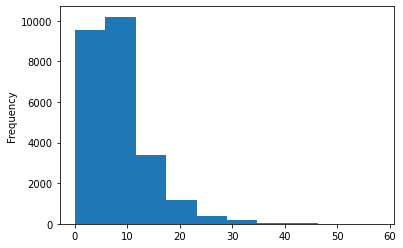

In [32]:
X_train.Positive_counts.plot.hist()

<AxesSubplot:ylabel='Frequency'>

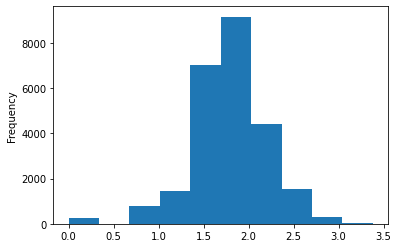

In [33]:
(X_train['Positive_counts'] ** 0.3).plot.hist()

<AxesSubplot:ylabel='Frequency'>

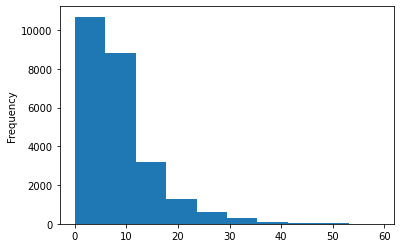

In [34]:
X_train.Negative_counts.plot.hist()

<AxesSubplot:ylabel='Frequency'>

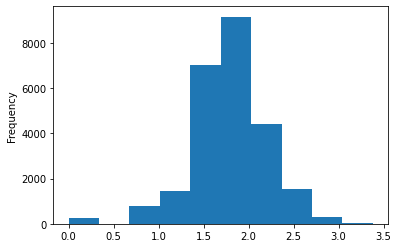

In [35]:
(X_train['Positive_counts'] ** 0.3).plot.hist()

In [36]:
X_train_norm = X_train.copy()
X_test_norm = X_test.copy()

In [37]:
X_train_norm['Positive_counts ^ 0.3'] = (X_train['Positive_counts'] ** 0.3)
X_train_norm['Negative_counts ^ 0.3'] = (X_train['Negative_counts'] ** 0.3)
X_test_norm['Positive_counts ^ 0.3'] = (X_test['Positive_counts'] ** 0.3)
X_test_norm['Negative_counts ^ 0.3'] = (X_test['Negative_counts'] ** 0.3)

X_train_norm.drop(['Positive_counts', 'Negative_counts'], axis = 1, inplace = True)
X_test_norm.drop(['Positive_counts', 'Negative_counts'], axis = 1, inplace = True)

In [42]:
start_time = timeit.default_timer()

lr_norm = LogisticRegression(lr = 0.0001, n_iters = 1000)
lr_norm.fit(X_train_norm, y_train)
pred_norm = lr_norm.predict(X_test_norm, threshold = 0.5)

elapsed = timeit.default_timer() - start_time
print("Time (minutes) elapsed for this cell:", elapsed/60)

test_metrics(y_test, pred_norm)

Time (minutes) elapsed for this cell: 0.02585393300008339
{'accuracy': 0.5, 'precision': 0.5, 'recall': 1.0, 'F1 Score': 0.6666666666666666}


,Actually Positive,Actually Negative
Predicted Positive,12500,12500
Predicted Negative,0,0


## Adding Interactions

In [14]:
X_train2 = X_train.copy()
X_test2 = X_test.copy()

In [15]:
X_train2["Interaction_posc_negc"] = X_train2.Positive_counts*X_train2.Negative_counts
X_test2["Interaction_posc_negc"] = X_test2.Positive_counts*X_test2.Negative_counts
X_train2 = X_train2[["Positive_counts","Negative_counts","Interaction_posc_negc"]]
X_test2 = X_test2[["Positive_counts","Negative_counts","Interaction_posc_negc"]]

In [17]:
start_time = timeit.default_timer()

lr2 = LogisticRegression(lr = 0.001, n_iters = 1000)
lr2.fit(X_train2, y_train)
pred2 = lr2.predict(X_test2, threshold = 0.5)
elapsed = timeit.default_timer() - start_time
print("Time (minutes) elapsed for this cell:", elapsed/60)

test_metrics(y_test, pred2)

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Time (minutes) elapsed for this cell: 0.05631852943333797
{'accuracy': 0.60804, 'precision': 0.8994380360839989, 'recall': 0.24328, 'F1 Score': 0.38297336439770796}


,Actually Positive,Actually Negative
Predicted Positive,3041,340
Predicted Negative,9459,12160


## Squared Terms

In [18]:
X_train3 = X_train2.copy()
X_test3 = X_test2.copy()

In [19]:
X_train3["Positive_counts2"] = X_train3.Positive_counts**2
X_train3["Negative_counts2"] = X_train3.Negative_counts**2
X_test3["Positive_counts2"] = X_test3.Positive_counts**2
X_test3["Negative_counts2"] = X_test3.Negative_counts**2

In [20]:
start_time = timeit.default_timer()

lr3 = LogisticRegression(lr = 0.001, n_iters = 1000)
lr3.fit(X_train3, y_train)
pred3 = lr3.predict(X_test3, threshold = 0.5)
elapsed = timeit.default_timer() - start_time
print("Time (minutes) elapsed for this cell:", elapsed/60)

test_metrics(y_test, pred3)

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Time (minutes) elapsed for this cell: 0.030126168883483236
{'accuracy': 0.66136, 'precision': 0.870635795663359, 'recall': 0.37904, 'F1 Score': 0.5281462490246349}


,Actually Positive,Actually Negative
Predicted Positive,4738,704
Predicted Negative,7762,11796


## Cubed Terms

In [21]:
X_train4 = X_train3.copy()
X_test4 = X_test3.copy()

In [22]:
X_train4["Positive_counts3"] = X_train3.Positive_counts**3
X_train4["Negative_counts3"] = X_train3.Negative_counts**3
X_test4["Positive_counts3"] = X_test3.Positive_counts**3
X_test4["Negative_counts3"] = X_test3.Negative_counts**3

In [23]:
start_time = timeit.default_timer()

lr4 = LogisticRegression(lr = 0.001, n_iters = 1000)
lr4.fit(X_train4, y_train)
pred4 = lr4.predict(X_test4, threshold = 0.5)
elapsed = timeit.default_timer() - start_time
print("Time (minutes) elapsed for this cell:", elapsed/60)

test_metrics(y_test, pred4)

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Time (minutes) elapsed for this cell: 0.033395657666551413
{'accuracy': 0.69584, 'precision': 0.83278955954323, 'recall': 0.49008, 'F1 Score': 0.6170427074939565}


,Actually Positive,Actually Negative
Predicted Positive,6126,1230
Predicted Negative,6374,11270


## Adjectives

In [4]:
train2 = pd.read_csv('Training_data2.csv')
test2 = pd.read_csv('Testing_data2.csv')

In [5]:
train2 = train2.drop("Unnamed: 0",axis=1)
test2 = test2.drop("Unnamed: 0",axis=1)

In [6]:
X_train_adj = train2.drop('Label', axis = 1)
X_test_adj = test2.drop('Label', axis = 1)
y_train_adj = train2.Label
y_test_adj = test2.Label

In [ ]:
cols_to_drop = []
df = df_train.drop(“Label”, axis=1)
for col in df:
    num_vals = len(df) - df[col].value_counts()[0]
    if num_vals < 2:
        cols_to_drop.append(col)
len(cols_to_drop)

In [22]:
lr_adj = LogisticRegression(lr = 0.001, n_iters = 1000)
lr_adj.fit(X_train_adj, y_train_adj)
pred_adj = lr_adj.predict(X_test_adj, threshold = 0.5)
test_metrics(y_test_adj, pred_adj)

{'accuracy': 0.51716, 'precision': 0.5346694682398577, 'recall': 0.26464, 'F1 Score': 0.35404291753625516}


,Actually Positive,Actually Negative
Predicted Positive,0.13232,0.11516
Predicted Negative,0.36768,0.38484


In [23]:
lr_adj.weights

array([-0.86862676,  0.5933466 , -0.43163432, ..., -0.70207841,
       -0.34709263,  0.99055848])

## Stanford

In [4]:
stanford_train = pd.read_csv('standford_train.csv')
stanford_test = pd.read_csv('stanford_test.csv')

In [6]:
stanford_train = stanford_train.drop("Unnamed: 0",axis=1)
stanford_test = stanford_test.drop("Unnamed: 0",axis=1)

In [7]:
stanford_train.head()
stanford_test.head()

,envision,infantry,faves,benito,glorified,staples,lepers,stripe,york,row,...,approximately,curse,story-telling,stakes,weill,plausibly,larsen,alike,everpresent,dirk
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
X_train_stan = stanford_train.drop('Label', axis = 1)
X_test_stan = stanford_test.drop('Label', axis = 1)
y_train_stan = stanford_train.Label
y_test_stan = stanford_test.Label

In [12]:
start_time = timeit.default_timer()

lr_stan = LogisticRegression(lr = 0.001, n_iters = 1000)
lr_stan.fit(X_train_stan, y_train_stan)
pred_stan = lr_stan.predict(X_test_stan, threshold = 0.5)

elapsed = timeit.default_timer() - start_time
print("Time (minutes) elapsed for this cell:", elapsed/60)

test_metrics(y_test_stan, pred_stan)

{'accuracy': 0.51048, 'precision': 0.5121996647420376, 'recall': 0.44, 'F1 Score': 0.4733625957483432}
Time (minutes) elapsed for this cell: 0.8563020351667849
